# Tarea 10.

# Felice-Nesseris-Tsujikawa parameterisation

### $$w(a)=w_a+(w_0-w_a)\frac{a^{1/\tau}[1-(a/a_t)^{1/\tau}]}{1-(a_t)^{-1/\tau}}$$

In [3]:
import numpy as np
import sympy as sy
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl

sy.init_printing()    #para que imprima bonito las integrales

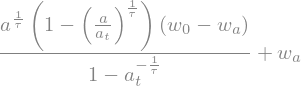

In [4]:
w0, wa, z_sy, zt, a, at, tau= sy.symbols('w_0 w_a z z_t a a_t \\tau')

eq_fnt=wa+(w0-wa)*((a**(1/tau)*(1-(a/at)**(1/tau))))/(1-(at)**(-1/tau))
eq_fnt

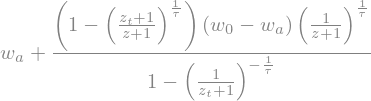

In [5]:
#sustituimos a por su correspondiente en z y a_t por z_t 
eq_fnt=eq_fnt.subs(a,1/(1+z_sy))
eq_fnt=eq_fnt.subs(at,1/(1+zt))
eq_fnt

Que podemos reescribir como:

### $$w_a + \frac{(w_0-w_a) A B^{1/\tau}}{1-C^{-1/\tau}}$$

Con:

### $$A=1−\left(\frac{z_t+1}{z+1}\right)^{1/\tau}$$
### $$B=\frac{1}{z+1}$$ 
### $$C=\frac{1}{z_t+1}$$

Sabemos que

### $$H^2(z) = H_0^2 \left( \Omega_m^0 (1+z)^{3} + \Omega_k^0 (1+z)^{2} + \Omega_{DE}^0 \hspace{0.2cm} f_{DE}(z) \right) \hspace{5cm} = H_0^2 \left( \Omega_m^0 (1+z)^{3} + \Omega_k^0 (1+z)^{2} + \Omega_{DE}^0 \hspace{0.2cm} \text{exp}\left[3\int^{z}_{0} \frac{(1+w(z))}{1+z}dz \right] \right) $$

Definamos la función w(z) para posteriormente, integrarla:

In [6]:
# la función w(z), pongámosla acá por si acaso hay que modificarla para pegarla al bloque de abajo...

def wz(z,w_0,w_a,z_t,tau_cte):
    A = 1-((z_t+1)/(z+1))**(1/tau_cte)
    B = 1/(z+1)
    C = 1/(z_t+1)
    tot = w_a+(((w_0-w_a)*A*(B**(1/tau_cte)))/(1-(C**(-1/tau_cte))))
    return tot

In [15]:
# el integrando completo y la función f_DE(z):
import scipy.integrate as sp_int

def integrand(z,w_0,w_a,z_t,tau_cte):
    A = 1-((z_t+1)/(z+1))**(1/tau_cte)
    B = 1/(z+1)
    C = 1/(z_t+1)
    tot = 3*(1+(w_a+(((w_0-w_a)*A*(B**(1/tau_cte)))/(1-(C**(-1/tau_cte))))))/(1+z)
    return tot


def fDE(z,w_0,w_a,z_t,tau_cte):
    F = lambda z: integrand(z,w_0,w_a,z_t,tau_cte)
    result = sp_int.quad(F,0.,z)[0]
    return result
fDE = np.vectorize(fDE)

In [16]:
def Hz_FNT(z,w_0,w_a,z_t,tau_cte):
    Hz = H0*np.sqrt(OmR*(1+z)**4+OmM*(1+z)**3 + OmK*(1+z)**2 + OmDE*fDE(z,w_0,w_a,z_t,tau_cte))
    return Hz

In [17]:
#fDE(np.linspace(0.001,3.,500),w_0=-1.,w_a=-.5,z_t=1.,tau_cte=3.)

#vemos que funciona! :D

Importamos los datos de cosmic_clocks:

In [18]:
data_Hz = np.loadtxt('cosmic_clocks_2022_nomethod.csv', delimiter=',',dtype=float, skiprows=1)

#data_Hz_float = data_Hz.astype(float)

redshift, Hz, err = [data_Hz[:,i] for i in [0,1,2]]

Definimos nuestras constantes de fondo:

In [33]:
OmR = 1e-4 
OmM = 0.3
OmK = -0.01
OmDE = 1-(OmR+OmM+OmK)
H0 = 68.    

z_range = np.linspace(0.001,3.,500)

Graficamos para cierta elección de parámetros:

## Gráfica con parámetros arbitrarios

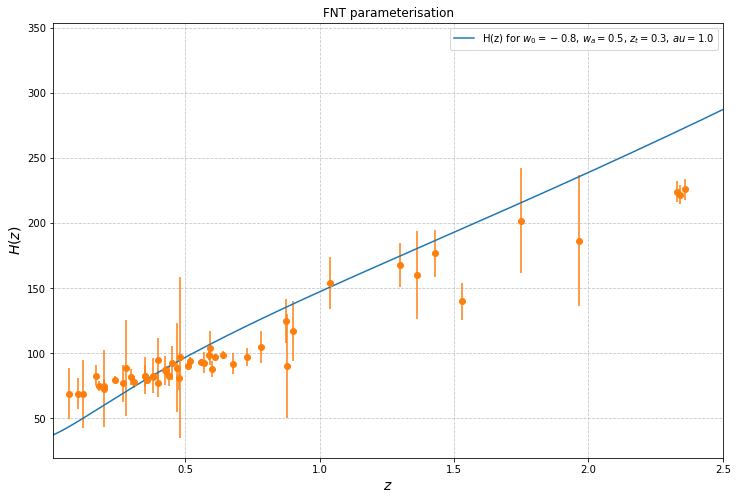

In [34]:
#z_range = np.arange(0.,10.,0.01)
z_range = np.linspace(0.001,3.,500)
w_0=-0.8
w_a=.5
z_t=0.3
tau_cte=1.

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(z_range,Hz_FNT(z_range,w_0,w_a,z_t,tau_cte),'-',label='H(z) for $w_0={0}$, $w_a={1}$, $z_t={2}$, $\tau={3}$'.format(w_0,w_a,z_t,tau_cte))
ax.errorbar(redshift,Hz,err,fmt='o')

ax.legend()
ax.set_title(r'FNT parameterisation')
ax.set_xlabel(r'$z$', fontsize=14)
ax.set_ylabel(r'$H(z)$',fontsize=14)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlim(0.01,2.5)
ax.grid(which='both',linestyle='--',alpha=0.7)

Después de jugar con los parámetros, los que se acercan más a pegarle a los datos son:

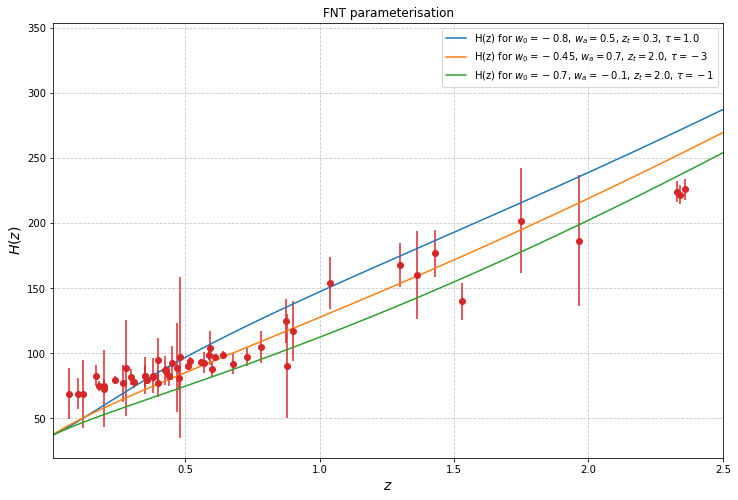

In [41]:
z_range = np.linspace(0.001,3.,500)
w_01=-0.8
w_a1=.5
z_t1=0.3
tau_cte1=1.

w_02=-.45
w_a2=0.7
z_t2=2.
tau_cte2=-3

w_03=-.7
w_a3=-0.1
z_t3=2.
tau_cte3=-1

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(z_range,Hz_FNT(z_range,w_01,w_a1,z_t1,tau_cte1),'-',label=r'H(z) for $w_0={0}$, $w_a={1}$, $z_t={2}$, $\tau={3}$'.format(w_01,w_a1,z_t1,tau_cte1))
ax.plot(z_range,Hz_FNT(z_range,w_02,w_a2,z_t2,tau_cte2),'-',label=r'H(z) for $w_0={0}$, $w_a={1}$, $z_t={2}$, $\tau={3}$'.format(w_02,w_a2,z_t2,tau_cte2))
ax.plot(z_range,Hz_FNT(z_range,w_03,w_a3,z_t3,tau_cte3),'-',label=r'H(z) for $w_0={0}$, $w_a={1}$, $z_t={2}$, $\tau={3}$'.format(w_03,w_a3,z_t3,tau_cte3))

ax.errorbar(redshift,Hz,err,fmt='o')

ax.legend()
ax.set_title(r'FNT parameterisation')
ax.set_xlabel(r'$z$', fontsize=14)
ax.set_ylabel(r'$H(z)$',fontsize=14)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlim(0.01,2.5)
ax.grid(which='both',linestyle='--',alpha=0.7)

Parecería ser que la combinación que más le pega a los datos es:

### $$w_0=-0.45$$

### $$w_0=-0.45$$

### $$w_0=-0.45$$